# BEV Representation from Multi-view Images

## Perspective to top down view transformation

In [20]:
import torch
import torch.nn as nn
import torchvision.models as models
from torch.utils.data import Dataset
import os
import sys
import cv2
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np

In [4]:
data_dict_subset_A = pd.read_pickle('../../OpenLane-V2/data/OpenLane-V2/data_dict_subset_A.pkl')

In [25]:
frame = data_dict_subset_A[('train', '00000', '315967376899927209')]['sensor']

In [13]:
root_path = "../../OpenLane-V2/data/OpenLane-V2/"
frame

{'image_path': 'train/00000/image/ring_front_center/315967376899927209.jpg',
 'extrinsic': {'rotation': array([[-9.57540534e-04,  5.28159325e-03,  9.99985594e-01],
         [-9.99999076e-01, -9.69974438e-04, -9.52430359e-04],
         [ 9.64930115e-04, -9.99985582e-01,  5.28251716e-03]]),
  'translation': array([1.63685016, 0.00213953, 1.40590799])},
 'intrinsic': {'K': array([[1.77733411e+03, 0.00000000e+00, 7.78222656e+02],
         [0.00000000e+00, 1.77733411e+03, 1.01621350e+03],
         [0.00000000e+00, 0.00000000e+00, 1.00000000e+00]]),
  'distortion': array([-0.24358925, -0.20579766,  0.32205908])}}

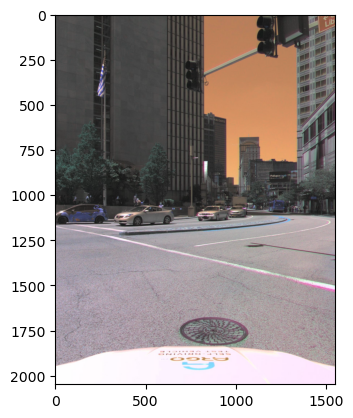

In [153]:

test_img = cv2.imread(f"{root_path}{frame['ring_front_center']['image_path']}")

plt.imshow(test_img)

In [172]:
tl = [0, 1000]
bl = [200, 1650]
tr = [1500, 1000]
br = [1300, 1650]

In [173]:
points1 = np.float32([tl, bl, tr, br])
points2 = np.float32([[0, 0], [0, 2048], [1550, 0], [1550, 2048]])

In [174]:
transform_mat = cv2.getPerspectiveTransform(points1, points2)
transform_mat

array([[ 6.45833333e-01, -2.58333333e-01,  3.22916667e+02],
       [ 0.00000000e+00,  1.70666667e+00, -2.13333333e+03],
       [-0.00000000e+00, -3.33333333e-04,  1.00000000e+00]])

In [181]:
h, w = test_img2.shape[:2]

# Apply the perspective transform
transformed_image = cv2.warpPerspective(test_img, transform_mat, (1550, 2048))
tr_img = cv2.resize(transformed_image, (480, 640))

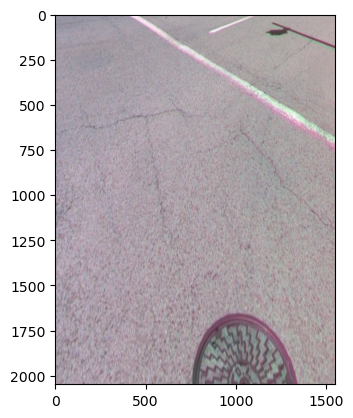

In [180]:
plt.imshow(transformed_image)

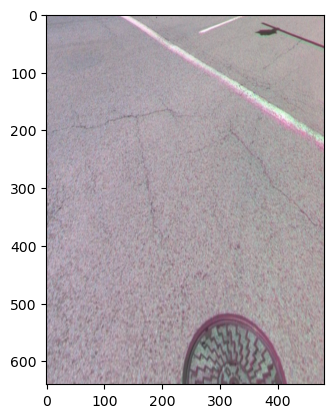

In [182]:
plt.imshow(tr_img)

In [187]:

def perspective_to_bev(root_path, frame):
    # coordinates
#     tl = [222, 387]
#     bl = [70, 472]
#     tr = [400, 380]
#     br = [538, 472]
    
    tl = [0, 1000]
    bl = [200, 1650]
    tr = [1500, 1000]
    br = [1300, 1650]

    bev_images = []
    
    for view in frame.keys():
        test_img = cv2.imread(f"{root_path}{frame[view]['image_path']}")
        h, w = test_img.shape[:2]
#         test_img2 = cv2.resize(test_img, (640 , 480)) 
        points1 = np.float32([tl, bl, tr, br])
        points2 = np.float32([[0, 0], [0, 2048], [1550, 0], [1550, 2048]])
        transform_mat = cv2.getPerspectiveTransform(points1, points2)
        
        # Apply the perspective transform
        transformed_image = cv2.warpPerspective(test_img, transform_mat, (1550, 2048))
        transformed_image = cv2.resize(transformed_image, (480 , 640)) 
        bev_images.append((test_img, transformed_image))
    return bev_images

In [185]:
bev_images = perspective_to_bev(root_path, frame)

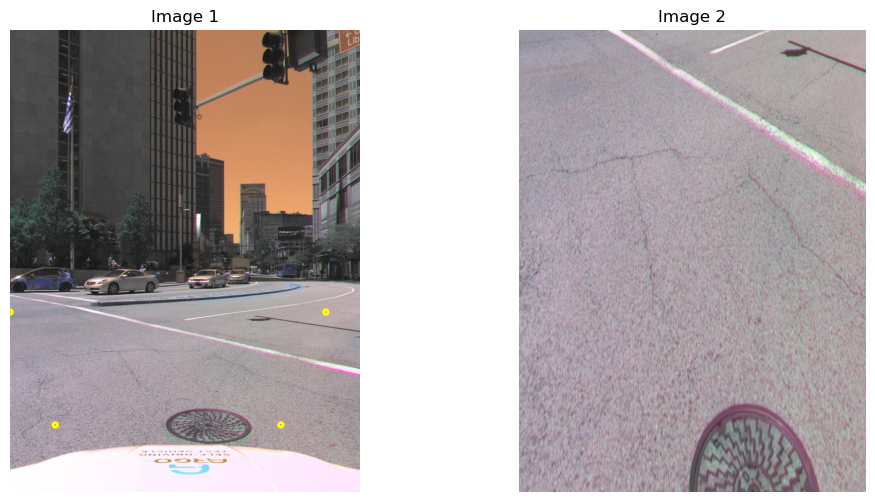

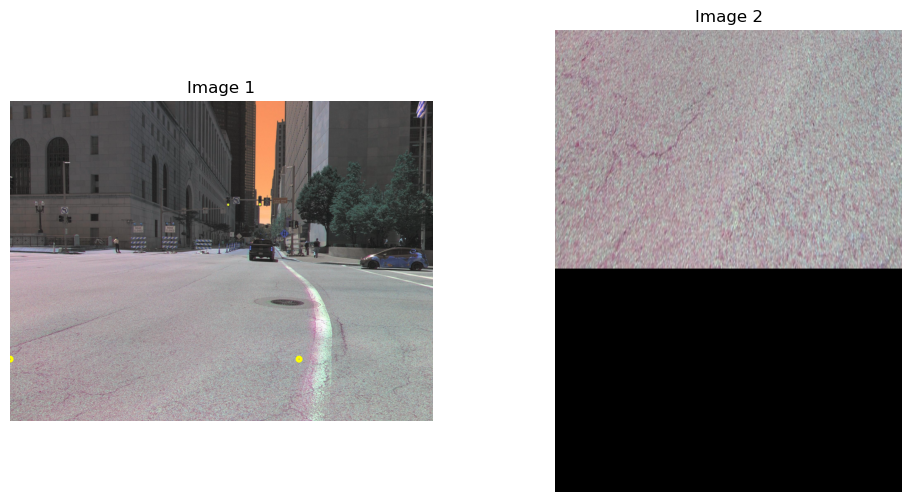

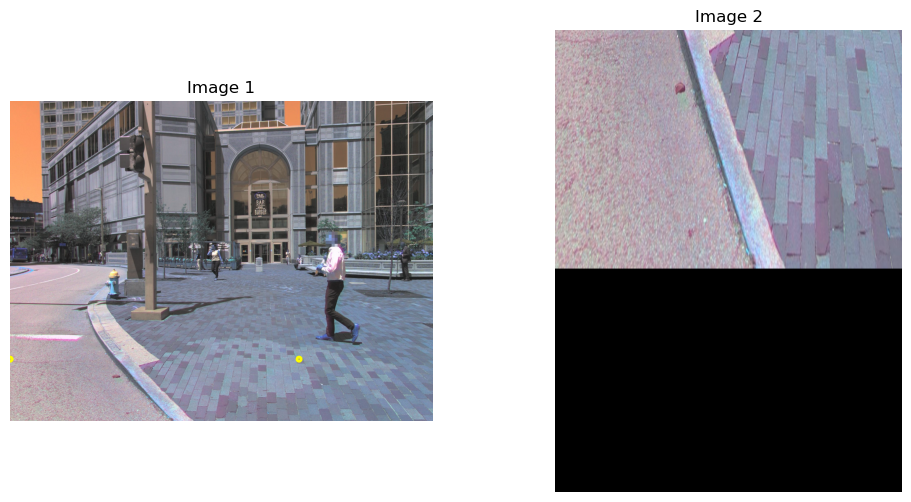

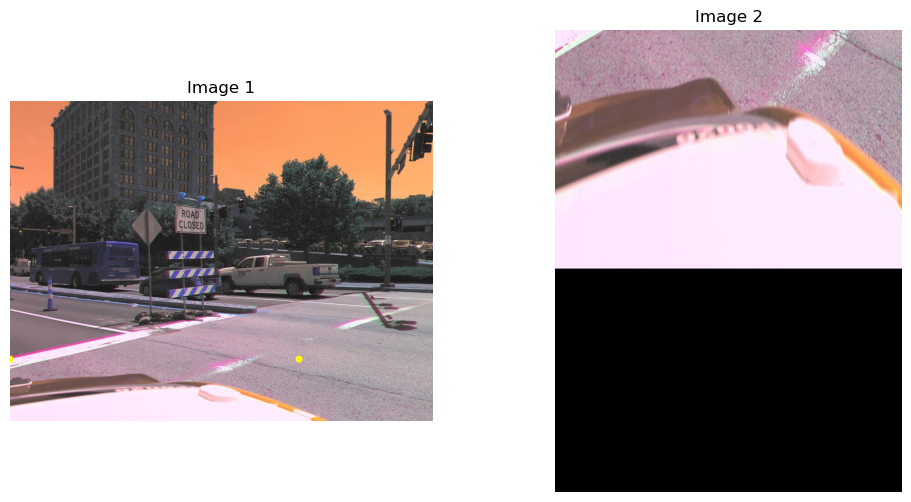

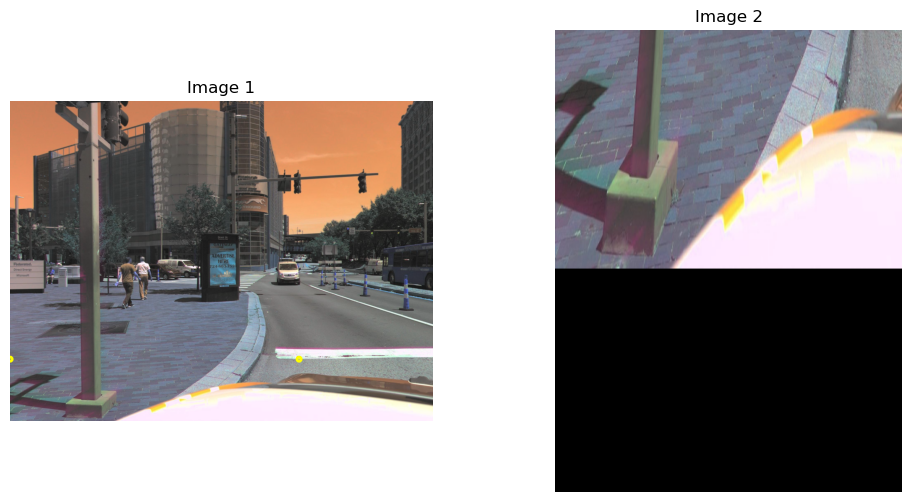

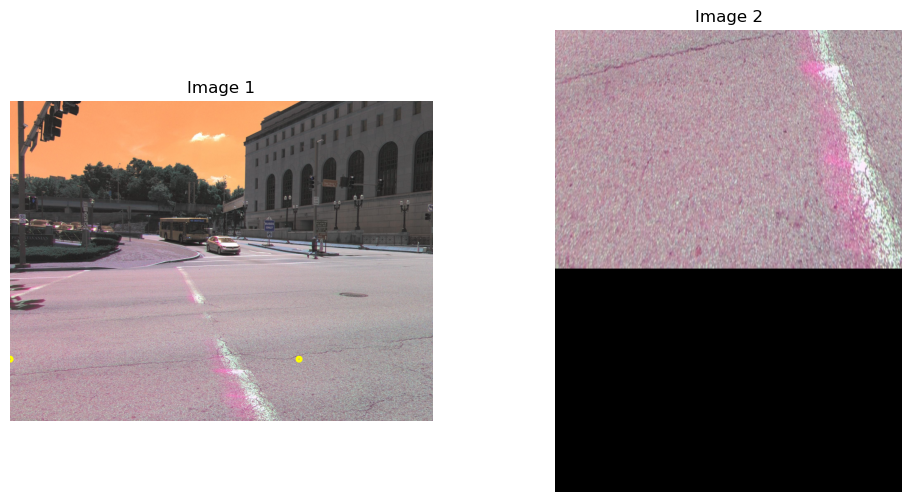

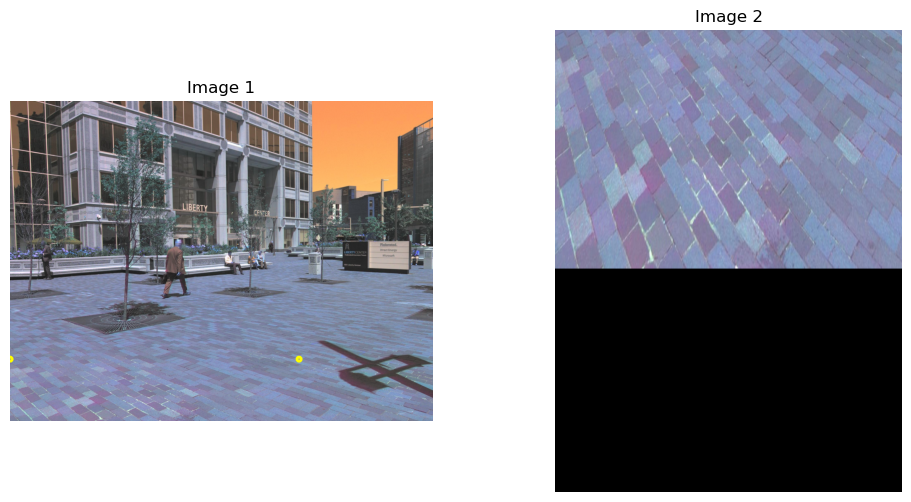

In [186]:
for pv,bv in bev_images:
    # Create a figure with 2 side-by-side subplots
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

    # Display the first image on the first subplot
    ax1.imshow(pv)
    ax1.set_title('Image 1')
    ax1.axis('off')  # Hide the axis
    
    # Highlight points with circles
    for p in [tl,bl,tr,br]:
        circle = plt.Circle((p[0], p[1]), radius=10, color='yellow', fill=False, linewidth=2)
        ax1.add_patch(circle)


    # Invert the y-axis to match image coordinate system
#     ax1.invert_yaxis()

        
    # Display the second image on the second subplot
    ax2.imshow(bv)
    ax2.set_title('Image 2')
    ax2.axis('off')  # Hide the axis

    # Adjust layout to prevent overlap
#     plt.tight_layout()

    # Show the plots
    plt.show()